#### Here I inspetct the raw dataframe, clean it, and analyze it

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('df_raw.csv')

In [3]:
# inspect it

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334795 entries, 0 to 1334794
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   kd               22552 non-null    float64
 1   ligand_cid       1301011 non-null  float64
 2   no_of_complexes  1334795 non-null  int64  
 3   protein_seq      1334686 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 40.7+ MB


In [5]:
df.isnull().sum()

kd                 1312243
ligand_cid           33784
no_of_complexes          0
protein_seq            109
dtype: int64

In [6]:
# too many null elements in the column "kd"

In [7]:
# checking the number of unique values

In [8]:
print(len(df["ligand_cid"].unique()))
print(len(df["protein_seq"].unique()))
print(df["no_of_complexes"].unique())

618990
5330
[ 1  2  3  4  5  9 11  8  6 14 19 12  7]


In [9]:
# looks as expected. But, we do not want the multiple complexes. So, we will remove them too includig the null entries.

df = df.dropna().reset_index(drop = True)

df_single_complex = df[df["no_of_complexes"]==1].reset_index(drop = True)
df_filtered = df_single_complex[["protein_seq", "ligand_cid", "kd"]]

In [10]:
df_filtered.info()
df_filtered.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21879 entries, 0 to 21878
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   protein_seq  21879 non-null  object 
 1   ligand_cid   21879 non-null  float64
 2   kd           21879 non-null  float64
dtypes: float64(2), object(1)
memory usage: 512.9+ KB


,protein_seq,ligand_cid,kd
0,MVRSVAWAGFMVLLMIPWGSAAKLVCYFTNWAQYRQGEARFLPKDL...,46511426.0,43000.0
1,MRFATSTIVK VALLLSSLCV DAAVMWNRDT SSTDLEARAS SG...,46511426.0,77000.0
2,MRFATSTIVK VALLLSSLCV DAAVMWNRDT SSTDLEARAS SG...,46511426.0,100000.0
3,MRFATSTIVK VALLLSSLCV DAAVMWNRDT SSTDLEARAS SG...,46511426.0,62000.0
4,MRFATSTIVK VALLLSSLCV DAAVMWNRDT SSTDLEARAS SG...,46511426.0,45000.0


In [11]:
print(len(df_filtered["ligand_cid"].unique()))
print(len(df_filtered["protein_seq"].unique()))

8136
1412


In [12]:
# Quick analysis of columns - lets check the kd values.
# Also, look at 'value_counts' for the two feature columns to get a sense of data uniformity. i.e. whether or not there are 
# some proteins and lignads that dominate the data

In [13]:
df_filtered['kd'].value_counts()

kd
0.6           1083
5.5            729
0.3            430
375.0          272
750.0          191
              ... 
6270.0           1
18910000.0       1
4550.0           1
74920.0          1
3300000.0        1
Name: count, Length: 2449, dtype: int64

In [14]:
# The above histogram is useless as the dataframe seems to have a few extremely large values. The unusually large
# kd values are not reliable, so 
df_filtered.loc[:, 'kd'] = df_filtered['kd'].apply(lambda x: 1 if x < 100 else 0)
df_filtered

,protein_seq,ligand_cid,kd
0,MVRSVAWAGFMVLLMIPWGSAAKLVCYFTNWAQYRQGEARFLPKDL...,46511426.0,0.0
1,MRFATSTIVK VALLLSSLCV DAAVMWNRDT SSTDLEARAS SG...,46511426.0,0.0
2,MRFATSTIVK VALLLSSLCV DAAVMWNRDT SSTDLEARAS SG...,46511426.0,0.0
3,MRFATSTIVK VALLLSSLCV DAAVMWNRDT SSTDLEARAS SG...,46511426.0,0.0
4,MRFATSTIVK VALLLSSLCV DAAVMWNRDT SSTDLEARAS SG...,46511426.0,0.0
...,...,...,...
21874,MGCGCSSHPEDDWMENIDVCENCHYPIVPLDGKGTLLIRNGSEVRD...,104037439.0,0.0
21875,MGCGCSSHPEDDWMENIDVCENCHYPIVPLDGKGTLLIRNGSEVRD...,103967460.0,0.0
21876,MGCGCSSHPEDDWMENIDVCENCHYPIVPLDGKGTLLIRNGSEVRD...,103967468.0,0.0
21877,MGCGCSSHPEDDWMENIDVCENCHYPIVPLDGKGTLLIRNGSEVRD...,103970006.0,0.0


In [15]:
df_filtered['kd'].value_counts()

kd
1.0    11117
0.0    10762
Name: count, dtype: int64

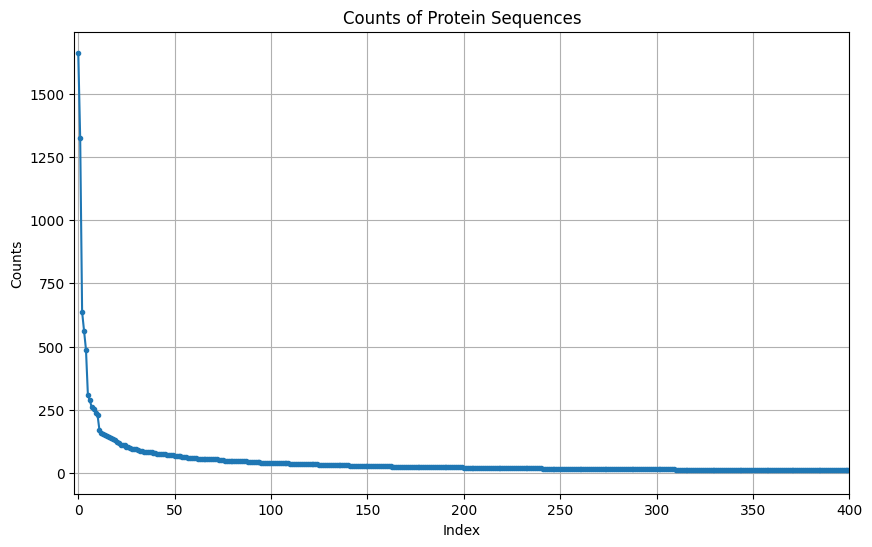

In [16]:
value_counts = df_filtered['protein_seq'].value_counts()

plt.figure(figsize=(10, 6))
plt.plot(value_counts.values, marker='.')
plt.title('Counts of Protein Sequences')
plt.xlabel('Index')
plt.ylabel('Counts')
plt.xlim(-2, 400)
plt.grid(True)
plt.show()

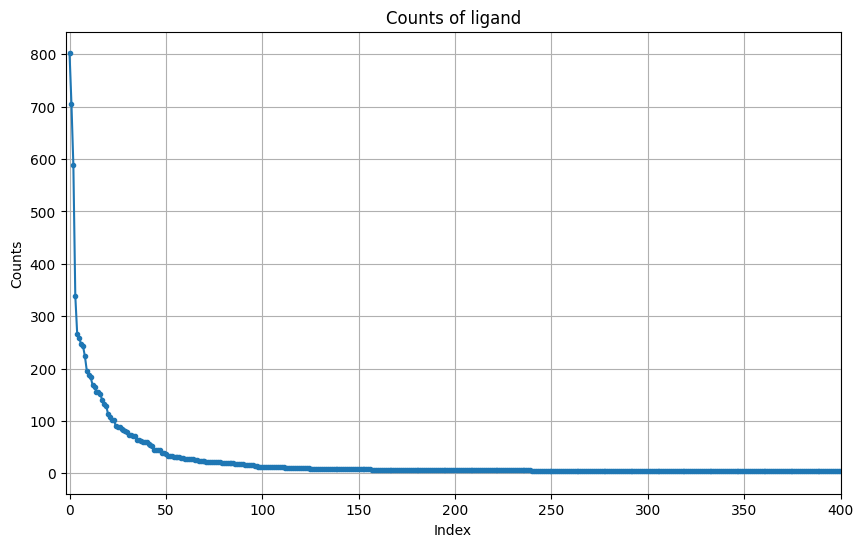

In [17]:
value_counts = df_filtered['ligand_cid'].value_counts()

plt.figure(figsize=(10, 6))
plt.plot(value_counts.values, marker = '.')
plt.title('Counts of ligand')
plt.xlabel('Index')
plt.ylabel('Counts')
plt.xlim(-2, 400)
plt.grid(True)
plt.show()

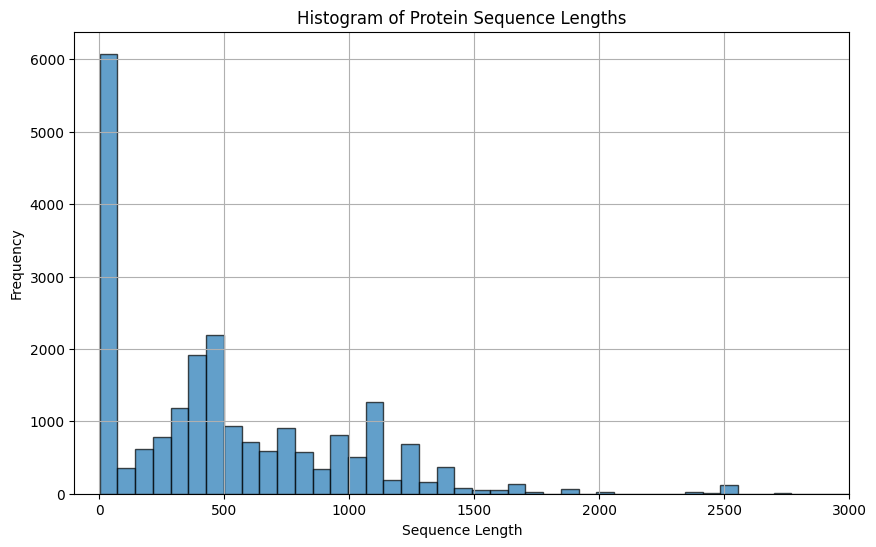

Bin edges: [1.00000e+00 7.19500e+01 1.42900e+02 2.13850e+02 2.84800e+02 3.55750e+02
 4.26700e+02 4.97650e+02 5.68600e+02 6.39550e+02 7.10500e+02 7.81450e+02
 8.52400e+02 9.23350e+02 9.94300e+02 1.06525e+03 1.13620e+03 1.20715e+03
 1.27810e+03 1.34905e+03 1.42000e+03 1.49095e+03 1.56190e+03 1.63285e+03
 1.70380e+03 1.77475e+03 1.84570e+03 1.91665e+03 1.98760e+03 2.05855e+03
 2.12950e+03 2.20045e+03 2.27140e+03 2.34235e+03 2.41330e+03 2.48425e+03
 2.55520e+03 2.62615e+03 2.69710e+03 2.76805e+03 2.83900e+03 2.90995e+03
 2.98090e+03 3.05185e+03 3.12280e+03 3.19375e+03 3.26470e+03 3.33565e+03
 3.40660e+03 3.47755e+03 3.54850e+03 3.61945e+03 3.69040e+03 3.76135e+03
 3.83230e+03 3.90325e+03 3.97420e+03 4.04515e+03 4.11610e+03 4.18705e+03
 4.25800e+03 4.32895e+03 4.39990e+03 4.47085e+03 4.54180e+03 4.61275e+03
 4.68370e+03 4.75465e+03 4.82560e+03 4.89655e+03 4.96750e+03 5.03845e+03
 5.10940e+03 5.18035e+03 5.25130e+03 5.32225e+03 5.39320e+03 5.46415e+03
 5.53510e+03 5.60605e+03 5.67700e+03 5.7

In [18]:
# Histogram for protein sequence lengths
# Calculate the lengths of protein sequences
sequence_lengths = df_filtered['protein_seq'].apply(len)

# Plot histogram and get the bin edges and counts
plt.figure(figsize=(10, 6))
counts, bin_edges, patches = plt.hist(sequence_lengths, bins=100, edgecolor='k', alpha=0.7)
plt.title('Histogram of Protein Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.xlim(-100, 3000)
plt.grid(True)
plt.show()

# Print the bins
print("Bin edges:", bin_edges)
print("Counts:", counts)

To summarize the above plots, the histogram shows that there are a lot of short proteins in the range of  length 45 - 90. Also, there are a few proteins and ligands that are dominating the data. It could be simply because they are most extensively studied by experimentalists. Next, some of the kd values in the raw dataframe were unphysically large, and were removed.
So, the quality of data does not seem to be as good as I expected, but I will move forward and see what I can get in terms of building ML models. 

In [19]:
df_filtered.to_csv('df_clean.csv', index = False)